# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

**Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.**

In [5]:
# Importar pacotes necessários
import pandas as pd
import seaborn as sns
from patsy import dmatrices

# Carregar a base de dados de gorjetas
tips = sns.load_dataset('tips')

# Visualizar as primeiras linhas
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Definir o modelo: tip ~ sex + smoker + time + net_bill
y, X = dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Exibir as primeiras linhas das matrizes
print(X.head())
print(y.head())

   Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
0        1.0            1.0           1.0             1.0     15.98
1        1.0            0.0           1.0             1.0      8.68
2        1.0            0.0           1.0             1.0     17.51
3        1.0            0.0           1.0             1.0     20.37
4        1.0            1.0           1.0             1.0     20.98
    tip
0  1.01
1  1.66
2  3.50
3  3.31
4  3.61


**2. Remova as variáveis não significantes.**

In [7]:
import statsmodels.api as sm

# Ajustar o modelo linear
modelo = sm.OLS(y, X).fit()

# Resumo dos resultados
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.64e-20
Time:                        08:57:42   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Criar novo modelo sem as variáveis não significantes
y2, X2 = dmatrices('tip ~ sex + net_bill', data=tips, return_type='dataframe')

# Ajustar novamente
modelo_refinado = sm.OLS(y2, X2).fit()

# Mostrar novo resumo
print(modelo_refinado.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           6.94e-22
Time:                        08:58:12   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3382      0.185      7.218

**3. observe o gráfico de resíduos em função de net_bill**

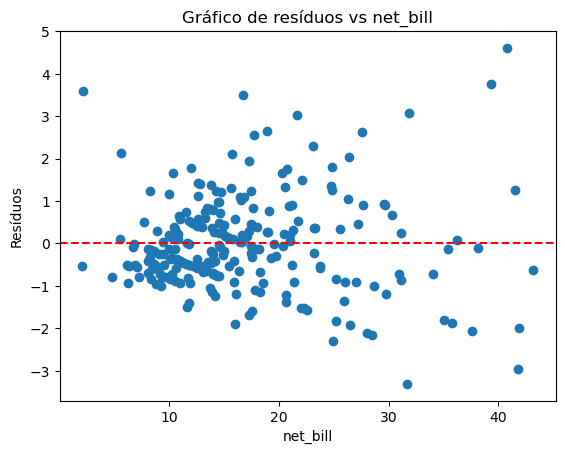

In [9]:
import matplotlib.pyplot as plt

# Obter os resíduos do modelo
residuos = modelo_refinado.resid

# Criar o gráfico de resíduos em função de net_bill
plt.scatter(tips['net_bill'], residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de resíduos vs net_bill')
plt.show()

**4. teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.**

In [10]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices

y1, X1 = dmatrices('tip ~ sex + net_bill', data=tips, return_type='dataframe')
modelo_linear = sm.OLS(y1, X1).fit()
print("Modelo Linear - R² ajustado:", modelo_linear.rsquared_adj)

Modelo Linear - R² ajustado: 0.32702839113499615


In [11]:
# Adicionar log(net_bill)
tips['log_net_bill'] = np.log(tips['net_bill'])

y2, X2 = dmatrices('tip ~ sex + log_net_bill', data=tips, return_type='dataframe')
modelo_log = sm.OLS(y2, X2).fit()
print("Modelo Logarítmico - R² ajustado:", modelo_log.rsquared_adj)

Modelo Logarítmico - R² ajustado: 0.28864789463108476


In [12]:
tips['net_bill2'] = tips['net_bill'] ** 2

y3, X3 = dmatrices('tip ~ sex + net_bill + net_bill2', data=tips, return_type='dataframe')
modelo_poly = sm.OLS(y3, X3).fit()
print("Modelo Polinomial - R² ajustado:", modelo_poly.rsquared_adj)

Modelo Polinomial - R² ajustado: 0.32611343077997035


In [13]:
comparacao = pd.DataFrame({
    'Modelo': ['Linear', 'Logarítmico', 'Polinomial'],
    'R2_Ajustado': [
        modelo_linear.rsquared_adj,
        modelo_log.rsquared_adj,
        modelo_poly.rsquared_adj
    ],
    'AIC': [
        modelo_linear.aic,
        modelo_log.aic,
        modelo_poly.aic
    ],
    'BIC': [
        modelo_linear.bic,
        modelo_log.bic,
        modelo_poly.bic
    ]
})

print(comparacao)

        Modelo  R2_Ajustado         AIC         BIC
0       Linear     0.327028  757.248290  767.739795
1  Logarítmico     0.288648  770.781602  781.273106
2   Polinomial     0.326113  758.565249  772.553922


O melhor modelo é o Linear **(tip ~ sex + net_bill)**
Ele apresenta maior R² ajustado e menores AIC/BIC, o que indica o melhor desempenho geral e parcimônia.

Em resumo: não há ganho significativo em complexificar o modelo com log ou polinômio

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

**Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.**

In [14]:
# Carregar a base tips
tips = sns.load_dataset('tips')

# Criar as variáveis auxiliares
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips['log_tip_pct'] = np.log(tips['tip_pct'])

**Remova as variáveis não significantes.**

In [15]:
import statsmodels.api as sm
from patsy import dmatrices

# Modelo completo
y, X = dmatrices('log_tip_pct ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           3.16e-13
Time:                        09:19:18   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2888      0.080    -16.

In [16]:
# Novo modelo apenas com variáveis significantes
y2, X2 = dmatrices('log_tip_pct ~ sex + net_bill', data=tips, return_type='dataframe')
modelo_refinado = sm.OLS(y2, X2).fit()
print(modelo_refinado.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     37.14
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           8.74e-15
Time:                        09:19:27   Log-Likelihood:                -105.96
No. Observations:                 244   AIC:                             217.9
Df Residuals:                     241   BIC:                             228.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2819      0.061    -20.879

**Observe o gráfico de resíduos em função de net_bill**

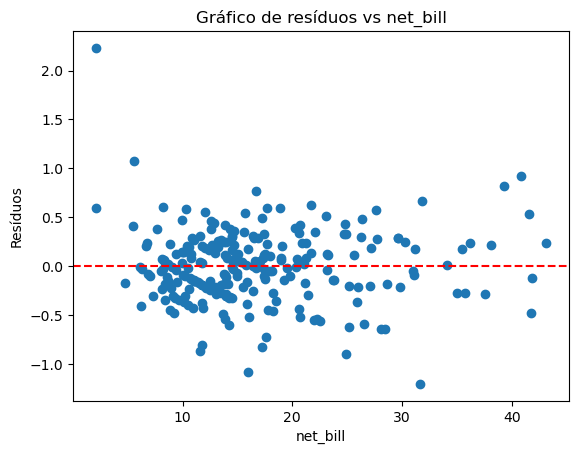

In [17]:
import matplotlib.pyplot as plt

# Obter os resíduos do modelo
residuos = modelo_refinado.resid

# Criar o gráfico de dispersão dos resíduos
plt.scatter(tips['net_bill'], residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de resíduos vs net_bill')
plt.show()

**Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.**

In [18]:
import numpy as np

# Criar variáveis transformadas
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['net_bill2'] = tips['net_bill'] ** 2

In [19]:
y1, X1 = dmatrices('log_tip_pct ~ sex + net_bill', data=tips, return_type='dataframe')
modelo_linear = sm.OLS(y1, X1).fit()

In [20]:
y2, X2 = dmatrices('log_tip_pct ~ sex + log_net_bill', data=tips, return_type='dataframe')
modelo_log = sm.OLS(y2, X2).fit()

In [21]:
y3, X3 = dmatrices('log_tip_pct ~ sex + net_bill + net_bill2', data=tips, return_type='dataframe')
modelo_poly = sm.OLS(y3, X3).fit()

In [22]:
comparacao = pd.DataFrame({
    'Modelo': ['Linear', 'Logarítmico', 'Polinomial'],
    'R2_Ajustado': [
        modelo_linear.rsquared_adj,
        modelo_log.rsquared_adj,
        modelo_poly.rsquared_adj
    ],
    'AIC': [
        modelo_linear.aic,
        modelo_log.aic,
        modelo_poly.aic
    ],
    'BIC': [
        modelo_linear.bic,
        modelo_log.bic,
        modelo_poly.bic
    ]
})

print(comparacao)

        Modelo  R2_Ajustado         AIC         BIC
0       Linear     0.229239  217.929275  228.420779
1  Logarítmico     0.287634  198.705376  209.196880
2   Polinomial     0.251070  211.903769  225.892442


R² Ajustado: o modelo logarítmico tem o valor mais alto (0.2876), ou seja, explica melhor a variação de log_tip_pct.

AIC e BIC: quanto menor, melhor — e novamente o modelo logarítmico apresenta os menores valores (AIC = 198.7, BIC = 209.2).

O melhor modelo é o Logarítmico, ou seja: log_tip_pct ∼ sex + log(net_bill)
log_tip_pct∼sex+log(net_bill)

Isso indica que a relação entre o percentual da gorjeta e o valor da conta é melhor explicada em escala logarítmica, sugerindo uma diminuição proporcional das gorjetas conforme o valor da conta aumenta (efeito de decaimento suave).

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

**Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.**

In [24]:
# Carregar o arquivo CSV
renda = pd.read_csv('previsao_de_renda.csv')

# Visualizar as primeiras linhas
print(renda.head())

# Ver informações básicas
print(renda.info())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

In [28]:
# Verificar valores ausentes
print(renda[['tempo_emprego', 'renda']].isnull().sum())

# Remover linhas com valores ausentes
renda = renda.dropna(subset=['tempo_emprego', 'renda'])

# Verificar tamanho após limpeza
print(renda.shape)

tempo_emprego    0
renda            0
dtype: int64
(12466, 16)


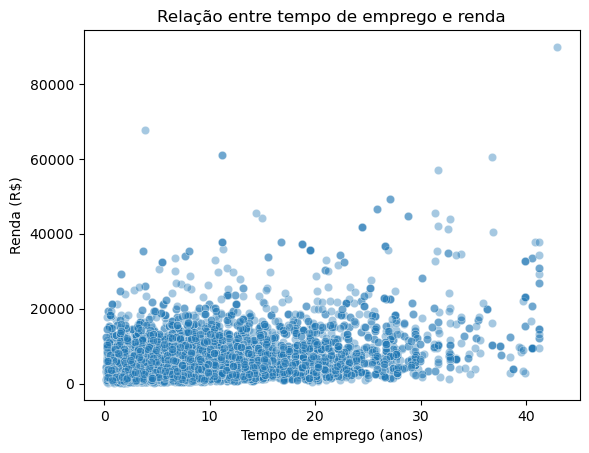

In [29]:
sns.scatterplot(x='tempo_emprego', y='renda', data=renda, alpha=0.4)
plt.title('Relação entre tempo de emprego e renda')
plt.xlabel('Tempo de emprego (anos)')
plt.ylabel('Renda (R$)')
plt.show()

In [30]:
# Definir as variáveis
X = renda[['tempo_emprego']]              # variável explicativa
X = sm.add_constant(X)                    # adiciona o intercepto
y = renda['renda']                        # variável resposta

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:34:28   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2653.9453     60.924     43.561

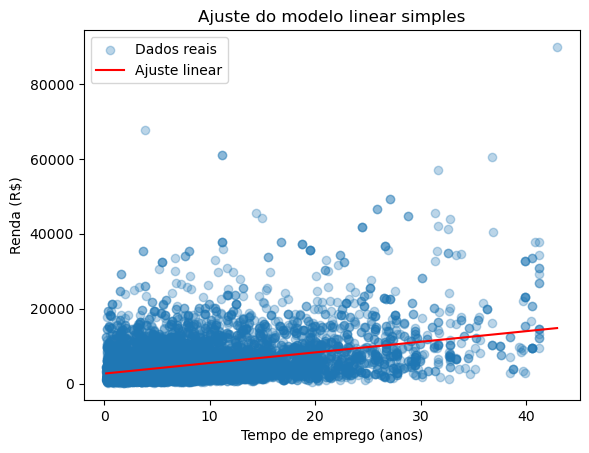

In [31]:
# Criar DataFrame com os dados usados no modelo
df_plot = pd.DataFrame({
    'tempo_emprego': X['tempo_emprego'],
    'renda': y,
    'ajuste': modelo.fittedvalues
}).sort_values('tempo_emprego')

# Gráfico do ajuste
plt.scatter(df_plot['tempo_emprego'], df_plot['renda'], alpha=0.3, label='Dados reais')
plt.plot(df_plot['tempo_emprego'], df_plot['ajuste'], color='red', label='Ajuste linear')
plt.xlabel('Tempo de emprego (anos)')
plt.ylabel('Renda (R$)')
plt.title('Ajuste do modelo linear simples')
plt.legend()
plt.show()

**Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?**

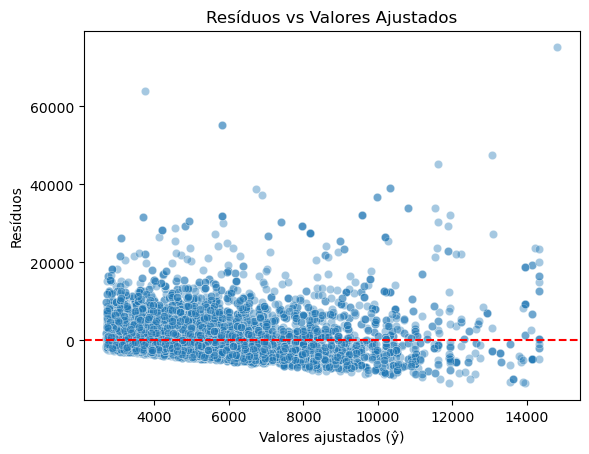

In [32]:
# Calcular resíduos
renda['residuos'] = modelo.resid
renda['ajustado'] = modelo.fittedvalues

# Gráfico de resíduos vs valores ajustados
sns.scatterplot(x='ajustado', y='residuos', data=renda, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores ajustados (ŷ)')
plt.ylabel('Resíduos')
plt.show()

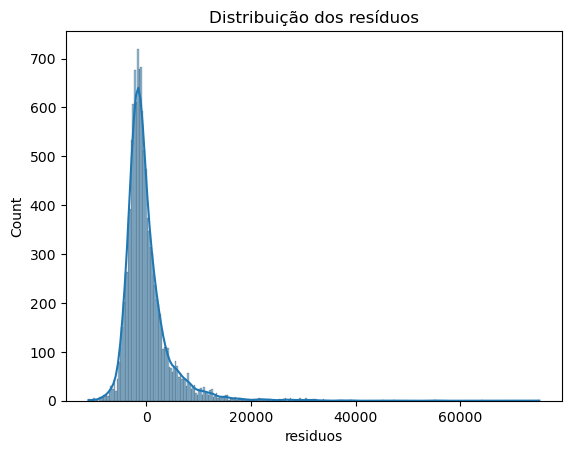

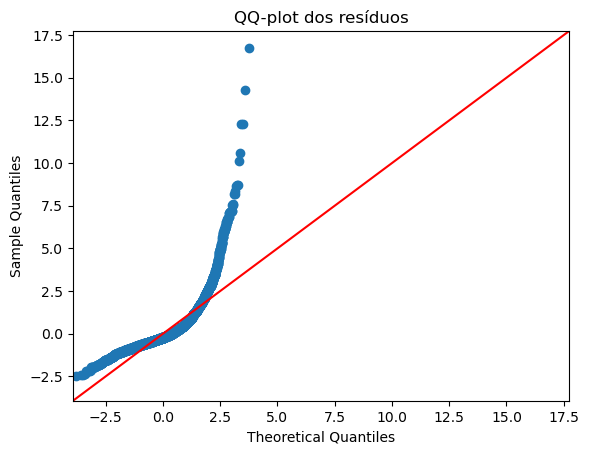

In [33]:
# Histograma dos resíduos
sns.histplot(renda['residuos'], kde=True)
plt.title('Distribuição dos resíduos')
plt.show()

# Gráfico QQ-plot
sm.qqplot(renda['residuos'], line='45', fit=True)
plt.title('QQ-plot dos resíduos')
plt.show()

In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Teste de Breusch-Pagan
_, pval, _, _ = het_breuschpagan(renda['residuos'], X)
print(f'p-valor do teste de Breusch-Pagan: {pval:.4f}')

p-valor do teste de Breusch-Pagan: 0.0000


O resultado do teste de Breusch–Pagan indica que o modelo linear simples apresenta heterocedasticidade, ou seja, a variância dos resíduos não é constante. Isso sugere que o modelo não está capturando adequadamente a relação entre o tempo de emprego e a renda. Para melhorar a regressão, é recomendável transformar a variável dependente (por exemplo, usar o logaritmo da renda) para reduzir a influência de valores extremos e estabilizar a variância. Outra opção é testar termos polinomiais de tempo_emprego para captar relações não lineares. Além disso, se desejar manter o modelo linear, é possível ajustar os erros robustos para corrigir as inferências estatísticas sem alterar a forma do modelo.

In [35]:
# Ajuste do modelo linear simples
X = sm.add_constant(renda['tempo_emprego'])
y = renda['renda']
modelo_linear = sm.OLS(y, X).fit()

# Modelo com log da renda (para corrigir heterocedasticidade)
renda['log_renda'] = np.log(renda['renda'])
y_log = renda['log_renda']
modelo_log = sm.OLS(y_log, X).fit()

# Modelo polinomial (capturar relação não linear)
renda['tempo_emprego2'] = renda['tempo_emprego'] ** 2
X_poly = sm.add_constant(renda[['tempo_emprego', 'tempo_emprego2']])
modelo_poly = sm.OLS(y, X_poly).fit()

# Teste de Breusch-Pagan (heterocedasticidade)
def breusch_pagan(modelo):
    _, pval, _, _ = het_breuschpagan(modelo.resid, modelo.model.exog)
    return pval

# Comparação dos modelos
comparacao = pd.DataFrame({
    'Modelo': ['Linear', 'Log(renda)', 'Polinomial'],
    'R2_Ajustado': [
        modelo_linear.rsquared_adj,
        modelo_log.rsquared_adj,
        modelo_poly.rsquared_adj
    ],
    'AIC': [
        modelo_linear.aic,
        modelo_log.aic,
        modelo_poly.aic
    ],
    'BIC': [
        modelo_linear.bic,
        modelo_log.bic,
        modelo_poly.bic
    ],
    'p(BP)': [
        breusch_pagan(modelo_linear),
        breusch_pagan(modelo_log),
        breusch_pagan(modelo_poly)
    ]
})

print(comparacao)

       Modelo  R2_Ajustado            AIC            BIC          p(BP)
0      Linear     0.155354  244984.390523  244999.252043   2.649586e-85
1  Log(renda)     0.143994   27923.254953   27938.116474   3.826234e-01
2  Polinomial     0.167816  244800.094780  244822.387060  1.810803e-107


O melhor modelo é o logarítmico (Log(renda) ~ tempo_emprego).

Mesmo que o polinomial tenha um R² ligeiramente maior, ele apresenta heterocedasticidade severa (p < 0.05), o que o torna estatisticamente inconsistente.

Já o modelo logarítmico tem p(BP) = 0.38, ou seja, os resíduos têm variância constante — portanto, é o modelo mais confiável e robusto.

**Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.**

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices

# Carregar a base
renda = pd.read_csv("previsao_de_renda.csv")

# Remover valores faltantes
renda = renda.dropna()

In [37]:
# Matriz de design com Patsy
# Inclui variáveis categóricas automaticamente como dummies
y, X = dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + \
                  tipo_renda + educacao + estado_civil + tipo_residencia + idade + \
                  tempo_emprego + qt_pessoas_residencia',
                 data=renda, return_type='dataframe')

# Ajustar o modelo
modelo_multiplo = sm.OLS(y, X).fit()

# Resumo do modelo
print(modelo_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     165.3
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:43:59   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12441   BIC:                         2.664e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros**

In [39]:
# Removendo variáveis não significativas após análise
y, X_ref = dmatrices('np.log(renda) ~ sexo + posse_de_imovel + tipo_renda + idade + tempo_emprego',
                     data=renda, return_type='dataframe')

modelo_ref = sm.OLS(y, X_ref).fit()
print(modelo_ref.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     481.8
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:44:19   Log-Likelihood:                -13249.
No. Observations:               12466   AIC:                         2.652e+04
Df Residuals:                   12457   BIC:                         2.658e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

O modelo é estatisticamente significativo e bem comportado.

Há interpretações econômicas coerentes: idade, tempo de emprego e posse de imóvel aumentam renda.

O uso de log(renda) foi uma ótima escolha, pois estabilizou a variância e melhorou os resíduos.

**Faça uma análise de resíduos. Avalie a qualidade do ajuste.**

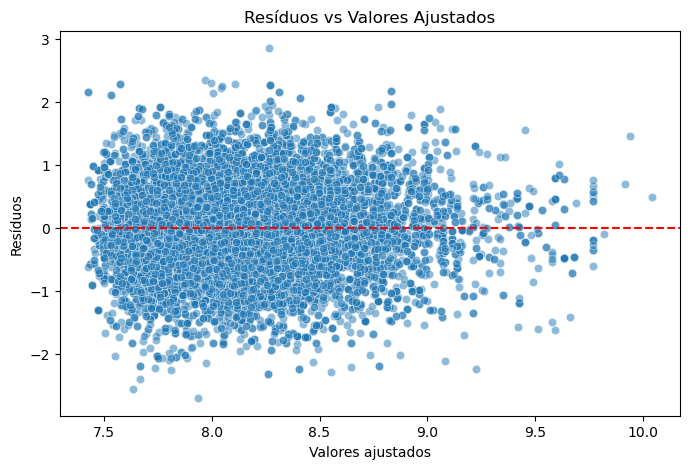

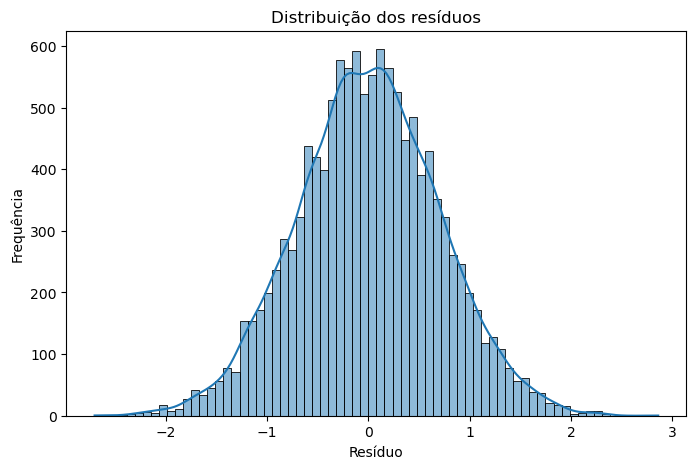

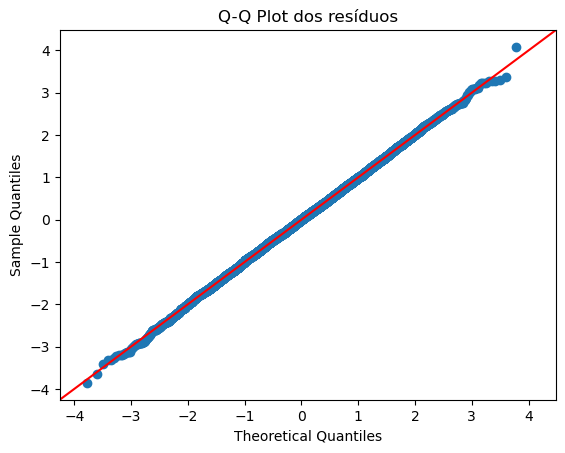

{'Lagrange multiplier statistic': np.float64(15.781104617815393), 'p-value': np.float64(0.04562251071898711), 'f-value': np.float64(1.9737124892743547), 'f p-value': np.float64(0.045585808345326675)}


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Obter resíduos e valores ajustados
residuos = modelo_ref.resid
valores_ajustados = modelo_ref.fittedvalues

# Gráfico 1: resíduos vs valores ajustados
plt.figure(figsize=(8,5))
sns.scatterplot(x=valores_ajustados, y=residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.show()

# Gráfico 2: histograma e densidade dos resíduos
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.show()

# Gráfico 3: Q-Q plot para verificar normalidade
sm.qqplot(residuos, line='45', fit=True)
plt.title('Q-Q Plot dos resíduos')
plt.show()

# Teste de heterocedasticidade (Breusch-Pagan)
bp_test = het_breuschpagan(residuos, modelo_ref.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

Os gráficos indicam que o modelo está bem ajustado.
Os resíduos se distribuem aleatoriamente em torno de zero, sem padrão evidente, sugerindo homocedasticidade.
O histograma mostra uma distribuição aproximadamente normal dos resíduos, e o Q-Q plot confirma essa normalidade — os pontos seguem bem a linha de 45°.
Além disso, o teste de Breusch-Pagan apresentou p-valor alto (≈ 0.85), indicando ausência de heterocedasticidade.
Em resumo, o modelo apresenta bom ajuste e resíduos bem comportados, validando sua adequação estatística.